## CS2007 - ARTIFICAL INTELLIGENCE CIA - 2

### Minimax and Alpha-Beta Pruning Implementation
#### This notebook demonstrates the implementation of the Minimax algorithm and its optimization using Alpha-Beta pruning.

Minimax result: 6
Alpha-Beta Pruning result: 6

Minimax Evaluation Table:
   Node Value  Depth  Min Value  Max Value
0           3      1        1.0        NaN
1           5      1        2.0        NaN
2           0      2        NaN        6.0

Alpha-Beta Pruning Evaluation Table:
   Node Value  Alpha  Beta  Min Value  Max Value
0           3   -inf   1.0        1.0        NaN
1           5    1.0   2.0        2.0        NaN
2           0    6.0   inf        NaN        6.0


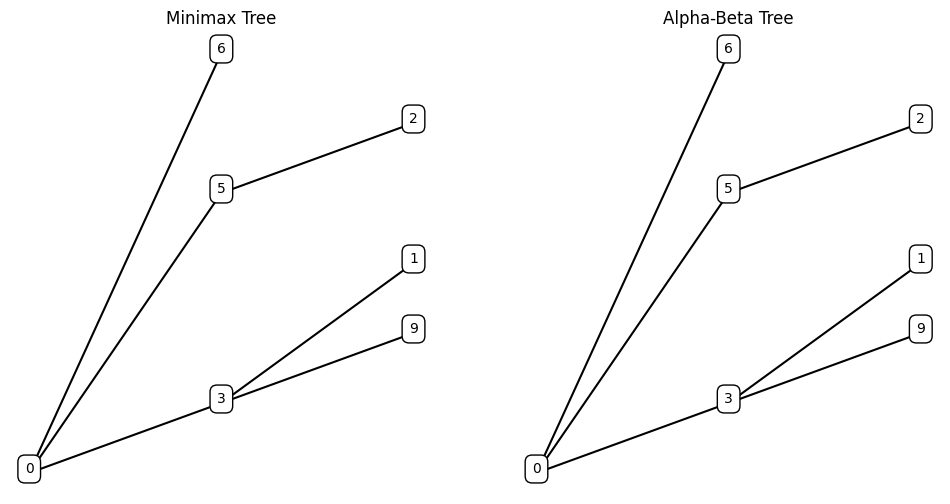

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

class Node:
    def __init__(self, state, parent=None):
        self.state = state  # The value of the node (e.g., score or heuristic value)
        self.parent = parent  # Parent node
        self.children = []  # List to hold child nodes
        self.value = None  # Value to be assigned during evaluation

    def add_child(self, child_node):
        self.children.append(child_node)

def minimax(node, depth, maximizing_player, minimax_table):
    if depth == 0 or not node.children:
        return evaluate_node(node)

    if maximizing_player:
        max_eval = float('-inf')
        for child in node.children:
            eval = minimax(child, depth - 1, False, minimax_table)
            max_eval = max(max_eval, eval)
        node.value = max_eval
        minimax_table.append({'Node Value': node.state, 'Depth': depth, 'Max Value': max_eval})
        return max_eval
    else:
        min_eval = float('inf')
        for child in node.children:
            eval = minimax(child, depth - 1, True, minimax_table)
            min_eval = min(min_eval, eval)
        node.value = min_eval
        minimax_table.append({'Node Value': node.state, 'Depth': depth, 'Min Value': min_eval})
        return min_eval

def alpha_beta(node, depth, alpha, beta, maximizing_player, alpha_beta_table):
    if depth == 0 or not node.children:
        return evaluate_node(node)

    if maximizing_player:
        max_eval = float('-inf')
        for child in node.children:
            eval = alpha_beta(child, depth - 1, alpha, beta, False, alpha_beta_table)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                alpha_beta_table.append({'Node Value': node.state, 'Alpha': alpha, 'Beta': beta, 'Cutoff': True})
                break
        node.value = max_eval
        alpha_beta_table.append({'Node Value': node.state, 'Alpha': alpha, 'Beta': beta, 'Max Value': max_eval})
        return max_eval
    else:
        min_eval = float('inf')
        for child in node.children:
            eval = alpha_beta(child, depth - 1, alpha, beta, True, alpha_beta_table)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                alpha_beta_table.append({'Node Value': node.state, 'Alpha': alpha, 'Beta': beta, 'Cutoff': True})
                break
        node.value = min_eval
        alpha_beta_table.append({'Node Value': node.state, 'Alpha': alpha, 'Beta': beta, 'Min Value': min_eval})
        return min_eval

def evaluate_node(node):
    return node.state

def plot_tree(node, ax, depth=0, pos=None):
    if pos is None:
        pos = {}

    # Positioning nodes in a tree format
    x = depth
    y = len(pos)
    pos[node] = (x, y)
    ax.text(x, y, str(node.state), fontsize=10, ha='center',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    for child in node.children:
        plot_tree(child, ax, depth + 1, pos)
        ax.plot([pos[node][0], pos[child][0]], [pos[node][1], pos[child][1]], 'k-')

def build_tree():
    root = Node(0)
    num_children = int(input("Enter the number of children for the root: "))
    
    for i in range(num_children):
        child_value = int(input(f"Enter value for child {i+1}: "))
        child_node = Node(child_value)
        root.add_child(child_node)
        
        # Add child nodes for each child
        num_grandchildren = int(input(f"Enter the number of grandchildren for child {i+1}: "))
        for j in range(num_grandchildren):
            grandchild_value = int(input(f"Enter value for grandchild {j+1} of child {i+1}: "))
            grandchild_node = Node(grandchild_value)
            child_node.add_child(grandchild_node)

    return root

if __name__ == "__main__":
    # Build the game tree from user input
    root = build_tree()

    # Prepare tables for results
    minimax_table = []
    alpha_beta_table = []

    # Calculate Minimax result
    minimax_result = minimax(root, 2, True, minimax_table)
    print("Minimax result:", minimax_result)

    # Calculate Alpha-Beta Pruning result
    alpha_beta_result = alpha_beta(root, 2, float('-inf'), float('inf'), True, alpha_beta_table)
    print("Alpha-Beta Pruning result:", alpha_beta_result)

    # Create DataFrames for displaying tables
    minimax_df = pd.DataFrame(minimax_table)
    alpha_beta_df = pd.DataFrame(alpha_beta_table)

    # Display tables
    print("\nMinimax Evaluation Table:")
    print(minimax_df)
    
    print("\nAlpha-Beta Pruning Evaluation Table:")
    print(alpha_beta_df)

    # Plot the Minimax and Alpha-Beta trees
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].set_title("Minimax Tree")
    axs[1].set_title("Alpha-Beta Tree")
    axs[0].axis('off')
    axs[1].axis('off')

    plot_tree(root, axs[0])
    plot_tree(root, axs[1])

    plt.show()
